In [ ]:
#instalasi TPOT
%pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=6b345359149b1b953f133e822f29fe9de02c8af1000ba22b9bc36d89739a0899
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
%pip install joblib

# Import Library

In [ ]:
from tpot import TPOTClassifier
import tpot
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Membaca data dummy untuk traning

In [ ]:
# load data
data = pd.read_excel("result_dummy.xlsx")
data = data.drop(['Unnamed: 0', 'anum', 'bnum'], axis=1)
X = data.drop('is_fraud', axis=1).values
y = data['is_fraud'].values

# plot the class distribution
pd.value_counts(data['is_fraud'])

0    2399
1    1108
Name: is_fraud, dtype: int64

In [ ]:
X

array([[ 2794,     7,  2794,     1,     7],
       [ 2455,    10,  2455,     1,    10],
       [ 2564,     6, 35417,    13,   116],
       ...,
       [   24,     8,    24,     1,     8],
       [   82,     2,    82,     1,     2],
       [   58,     1,    58,     1,     1]])

In [ ]:
# split data into train, validation, and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Memulai membuat model dengan train data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load


In [ ]:
# model = tpot.TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)
model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=0.6500000000000001, min_samples_leaf=19, min_samples_split=3, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features=0.6500000000000001, min_samples_leaf=19,
                       min_samples_split=3)

In [ ]:
#Save the model to a file
model_filename = 'rf_model.joblib'
dump(model, model_filename)

# To load the model later
loaded_model = load(model_filename)

In [ ]:
y_pred = model.predict(X_test)
pred = model.predict(X_train)

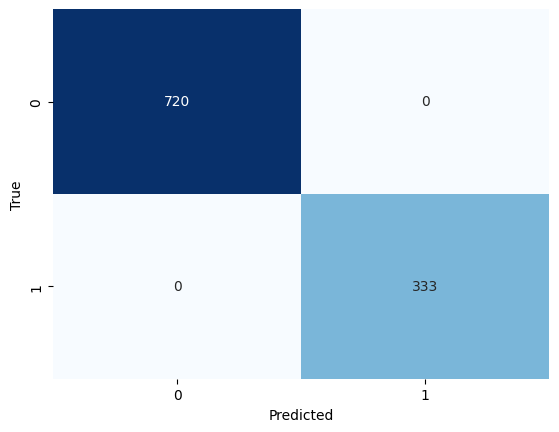

Accuracy : 100.00%
Precision : 100.00%
Recall : 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision : {precision_score(y_test, y_pred)*100:.2f}%')
print(f'Recall : {recall_score(y_test, y_pred)*100:.2f}%')

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)
print("Classification report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[720   0]
 [  0 333]]
TN:  720
FP:  0
FN:  0
TP:  333
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00       333

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred, average='macro')*100
recall = recall_score(y_test,y_pred, average='macro')*100
f1 = f1_score(y_test,y_pred, average='macro')*100

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Metrics:
Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1 Score: 100.00


In [ ]:
from sklearn import tree

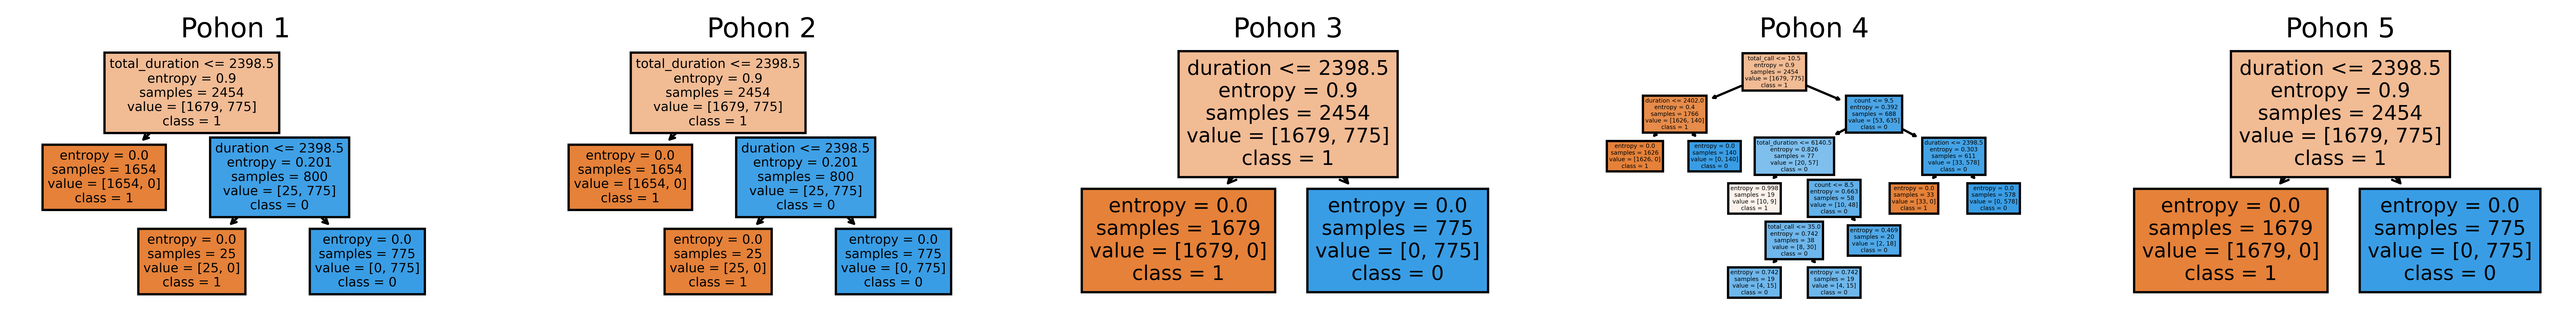

In [ ]:
# Visualisasi masing-masing pohon dalam Random Forest
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2), dpi=800)
for i in range(5):
    tree.plot_tree(model.estimators_[i], feature_names=data.columns[0:5],class_names = [str(class_name) for class_name in data['is_fraud'].unique()], filled=True, ax=axes[i])
    axes[i].set_title('Pohon {}'.format(i+1))

plt.show()